In [193]:
!pip install -q datascience                   # Package that is required by pandas profiling
!pip install -q pandas-profiling              # Library to generate basic statistics about data 
!pip install pandas==0.25

In [194]:
#------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis) 
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high      
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                # To split the data in training and testing part     
from sklearn.linear_model import LinearRegression
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

In [195]:
from sklearn import preprocessing
data = pd.read_csv('/content/train_data.csv')

data.head()

,Index,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,9710,Resort Hotel,1,122,2016,December,53,27,0,4,2,0.00000,0,BB,FRA,Online TA,TA/TO,0,0,0,D,D,3,No Deposit,240.00000,0,Transient,74.75000,0,2,Canceled,2016-11-27
1,40307,City Hotel,1,20,2015,July,30,22,0,2,2,0.00000,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,No Deposit,1.00000,0,Transient-Party,62.00000,0,0,Canceled,2015-07-17
2,110051,City Hotel,0,87,2017,April,16,16,2,3,3,0.00000,0,BB,BEL,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.00000,0,Transient,171.00000,0,0,Check-Out,2017-04-21
3,22999,Resort Hotel,0,0,2017,February,5,2,0,1,1,0.00000,0,BB,PRT,Online TA,TA/TO,1,0,1,A,A,0,No Deposit,196.00000,0,Transient,43.00000,0,1,Check-Out,2017-02-03
4,8344,Resort Hotel,1,42,2016,September,39,23,0,1,2,0.00000,0,BB,IRL,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.00000,0,Transient,109.00000,0,1,Canceled,2016-08-26


In [225]:
data.duplicated().sum()

20480

In [228]:
data_ori.groupby("country").count()

,Index,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ABW,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
AGO,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,194,260,260,260,260,260,260,260
AIA,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
ALB,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,5,7,7,7,7,7,7,7
AND,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
ARE,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,34,36,36,36,36,36,36,36
ARG,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144,131,144,144,144,144,144,144,144
ARM,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
ATA,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [197]:
data_op_ori = pd.read_csv('/content/test_data.csv')
data_ori = pd.read_csv('/content/train_data.csv')

In [198]:
data_op = pd.read_csv('/content/test_data.csv')

In [199]:
profile = ProfileReport(df = data)
profile.to_file(outputfile = 'Pre Profiling Report.html')
print('Accomplished!')

Accomplished!


In [200]:
data.head()

,Index,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,9710,Resort Hotel,1,122,2016,December,53,27,0,4,2,0.00000,0,BB,FRA,Online TA,TA/TO,0,0,0,D,D,3,No Deposit,240.00000,0,Transient,74.75000,0,2,Canceled,2016-11-27
1,40307,City Hotel,1,20,2015,July,30,22,0,2,2,0.00000,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,No Deposit,1.00000,0,Transient-Party,62.00000,0,0,Canceled,2015-07-17
2,110051,City Hotel,0,87,2017,April,16,16,2,3,3,0.00000,0,BB,BEL,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.00000,0,Transient,171.00000,0,0,Check-Out,2017-04-21
3,22999,Resort Hotel,0,0,2017,February,5,2,0,1,1,0.00000,0,BB,PRT,Online TA,TA/TO,1,0,1,A,A,0,No Deposit,196.00000,0,Transient,43.00000,0,1,Check-Out,2017-02-03
4,8344,Resort Hotel,1,42,2016,September,39,23,0,1,2,0.00000,0,BB,IRL,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.00000,0,Transient,109.00000,0,1,Canceled,2016-08-26


In [201]:
label_encoder = preprocessing.LabelEncoder()
data["hotel"] = label_encoder.fit_transform(data["hotel"])
data["arrival_date_month"] = label_encoder.fit_transform(data["arrival_date_month"])
data["meal"] = label_encoder.fit_transform(data["meal"])
data["country"] = label_encoder.fit_transform(data["country"])
data["market_segment"] = label_encoder.fit_transform(data["market_segment"])
data["distribution_channel"] = label_encoder.fit_transform(data["distribution_channel"])
data["reserved_room_type"] = label_encoder.fit_transform(data["reserved_room_type"])
data["assigned_room_type"] = label_encoder.fit_transform(data["assigned_room_type"])
data["deposit_type"] = label_encoder.fit_transform(data["deposit_type"])
data["customer_type"] = label_encoder.fit_transform(data["customer_type"])
data["reservation_status"] = label_encoder.fit_transform(data["reservation_status"])


data_op["hotel"] = label_encoder.fit_transform(data_op["hotel"])
data_op["arrival_date_month"] = label_encoder.fit_transform(data_op["arrival_date_month"])
data_op["meal"] = label_encoder.fit_transform(data_op["meal"])
data_op["country"] = label_encoder.fit_transform(data_op["country"])
data_op["market_segment"] = label_encoder.fit_transform(data_op["market_segment"])
data_op["distribution_channel"] = label_encoder.fit_transform(data_op["distribution_channel"])
data_op["reserved_room_type"] = label_encoder.fit_transform(data_op["reserved_room_type"])
data_op["assigned_room_type"] = label_encoder.fit_transform(data_op["assigned_room_type"])
data_op["deposit_type"] = label_encoder.fit_transform(data_op["deposit_type"])
data_op["customer_type"] = label_encoder.fit_transform(data_op["customer_type"])
data_op["reservation_status"] = label_encoder.fit_transform(data_op["reservation_status"])

In [202]:
data.describe()

,Index,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
count,83573.00000,83573.00000,83573.00000,83573.00000,83573.00000,83573.00000,83573.00000,83573.00000,83573.00000,83573.00000,83573.00000,83569.00000,83573.00000,83573.00000,83573.00000,83573.00000,83573.00000,83573.00000,83573.00000,83573.00000,83573.00000,83573.00000,83573.00000,83573.00000,72156.00000,83573.00000,83573.00000,83573.00000,83573.00000,83573.00000,83573.00000
mean,59781.24971,0.33465,0.36956,103.91337,2016.15619,5.49339,27.14830,15.78334,0.92756,2.50131,1.85602,0.10366,0.00812,0.55769,89.02275,4.93210,2.58779,0.03197,0.08776,0.13467,0.98982,1.33006,0.22133,0.12479,86.57068,2.30804,2.13677,101.76724,0.06263,0.57118,0.65098
std,34509.35758,0.47187,0.48269,106.86844,0.70772,3.53790,13.60449,8.79172,1.00110,1.91476,0.58238,0.39736,0.09670,1.07114,42.28730,1.26598,0.90521,0.17593,0.85701,1.48262,1.69561,1.87898,0.65667,0.33501,110.85866,17.50296,0.57780,51.52498,0.24626,0.79179,0.49774
min,1.00000,0.00000,0.00000,0.00000,2015.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,-6.38000,0.00000,0.00000,0.00000
25%,29832.00000,0.00000,0.00000,18.00000,2016.00000,2.00000,16.00000,8.00000,0.00000,1.00000,2.00000,0.00000,0.00000,0.00000,54.00000,4.00000,3.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,9.00000,0.00000,2.00000,69.29000,0.00000,0.00000,0.00000
50%,59849.00000,0.00000,0.00000,69.00000,2016.00000,6.00000,27.00000,16.00000,1.00000,2.00000,2.00000,0.00000,0.00000,0.00000,78.00000,5.00000,3.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,14.00000,0.00000,2.00000,94.50000,0.00000,0.00000,1.00000
75%,89699.00000,1.00000,1.00000,160.00000,2017.00000,8.00000,38.00000,23.00000,2.00000,3.00000,2.00000,0.00000,0.00000,0.00000,128.00000,6.00000,3.00000,0.00000,0.00000,0.00000,3.00000,3.00000,0.00000,0.00000,229.00000,0.00000,2.00000,126.00000,0.00000,1.00000,1.00000
max,119388.00000,1.00000,1.00000,737.00000,2017.00000,11.00000,53.00000,31.00000,18.00000,42.00000,50.00000,3.00000,10.00000,4.00000,169.00000,7.00000,4.00000,1.00000,26.00000,71.00000,9.00000,10.00000,21.00000,2.00000,535.00000,391.00000,3.00000,5400.00000,8.00000,5.00000,2.00000


In [203]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83573 entries, 0 to 83572
Data columns (total 32 columns):
Index                             83573 non-null int64
hotel                             83573 non-null int64
is_canceled                       83573 non-null int64
lead_time                         83573 non-null int64
arrival_date_year                 83573 non-null int64
arrival_date_month                83573 non-null int64
arrival_date_week_number          83573 non-null int64
arrival_date_day_of_month         83573 non-null int64
stays_in_weekend_nights           83573 non-null int64
stays_in_week_nights              83573 non-null int64
adults                            83573 non-null int64
children                          83569 non-null float64
babies                            83573 non-null int64
meal                              83573 non-null int64
country                           83573 non-null int64
market_segment                    83573 non-null int64
distribut

In [204]:
    cor_matrix = data.corr().abs()
    #print(cor_matrix)
    
    upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


    to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.99)]
  
    print(); print(to_drop)


[]


In [205]:
data.drop(data[to_drop], axis=1,inplace = True)
data.drop('Index', axis = 1,inplace=True)
data.drop('reservation_status_date', axis = 1,inplace=True)


data_op.drop(data_op[to_drop], axis=1,inplace = True)
data_op.drop('Index', axis = 1,inplace=True)
data_op.drop('reservation_status_date', axis = 1,inplace=True)


In [206]:
columns = data.columns
for each in columns:
  data.fillna(value=data[each].mean(), inplace=True)


In [207]:
x=pd.DataFrame(data)
x.drop("is_canceled",axis =1,inplace=True)


In [208]:
x.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,1,122,2016,2,53,27,0,4,2,0.00000,0,0,54,6,3,0,0,0,3,3,3,0,240.00000,0,2,74.75000,0,2,0
1,0,20,2015,5,30,22,0,2,2,0.00000,0,0,128,4,3,0,0,0,0,0,0,0,1.00000,0,3,62.00000,0,0,0
2,0,87,2017,0,16,16,2,3,3,0.00000,0,0,14,6,3,0,0,0,3,3,0,0,9.00000,0,2,171.00000,0,0,1
3,1,0,2017,3,5,2,0,1,1,0.00000,0,0,128,6,3,1,0,1,0,0,0,0,196.00000,0,2,43.00000,0,1,1
4,1,42,2016,11,39,23,0,1,2,0.00000,0,0,73,6,3,0,0,0,0,0,0,0,240.00000,0,2,109.00000,0,1,0


In [209]:
y=data["is_canceled"]
y.head()

0    1
1    1
2    0
3    0
4    1
Name: is_canceled, dtype: int64

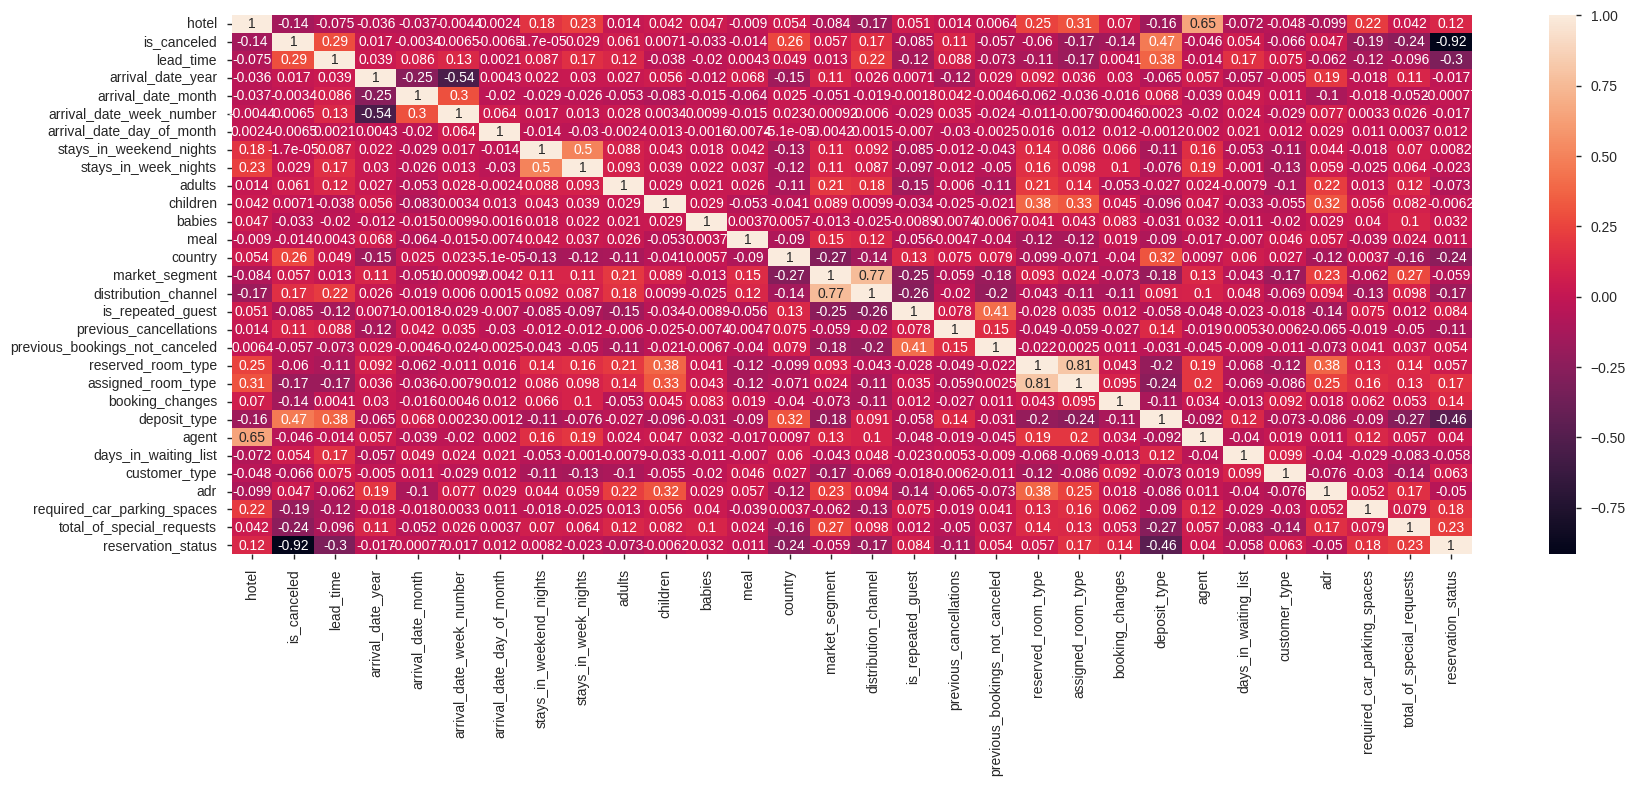

In [210]:
plt.figure(figsize=(20,7))
sns.heatmap(data.corr(), annot=True)

In [211]:
#sns.pairplot(data=data, diag_kind='kde')

#plt.show()

In [212]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.01, random_state = 3)


In [213]:



print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(82737, 29)
(82737,)
(836, 29)
(836,)


In [214]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = data_op
x_test = sc.transform(x_test)

In [215]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor

lr = KNeighborsClassifier(n_neighbors = 4)

#param_grid = {'criterion': ['squared_error','absolute_error','friedman_mse','poisson'],
 #                'max_depth': list(range(2,500)),
  #              'max_features': ['auto', 'sqrt', 'log2'],
   #             'min_samples_split': list(range(2,500))}

#lr = RandomizedSearchCV(cv, param_grid, cv= 10)


lr.fit(x_train,y_train)




KNeighborsClassifier(n_neighbors=4)

In [216]:
#print(lr.best_score_)
#print(lr.best_params_)
#print(lr.best_estimator_)

In [217]:
y_test_pred_op = lr.predict(x_test)


In [218]:
y_test_pred_op.astype('int32')
y_test_pred_op = pd.DataFrame(y_test_pred_op)

y_test_pred_op.head(2)

,0
0,0
1,1


In [219]:

op = pd.DataFrame(data_op_ori["Index"])

out = [op,y_test_pred_op]

op = pd.concat(out, axis =1)

op.set_index('Index')   

op[op.columns[1]] = op[op.columns[1]].astype("Int64")

op.columns =['Index', 'OP']

op.head(2)


,Index,OP
0,30946,0
1,40207,1


In [220]:
print(op.to_csv('/content/submission.csv', index=False, header=False))

None


In [221]:
y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

In [222]:
x_test.shape

(30894, 29)

In [223]:
from sklearn import metrics
r2_train = metrics.r2_score(y_train,y_train_pred)
r2_test = metrics.r2_score(y_test,y_test_pred)
print("R2 score for training set is {}".format(r2_train))
print("R2 score for test set is {}".format(r2_test))

print((r2_train) - (r2_test))

ValueError: ignored

In [ ]:
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_train_pred))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))